<a href="https://colab.research.google.com/github/AUMichiganFan/GenderMLModel/blob/main/gender_ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

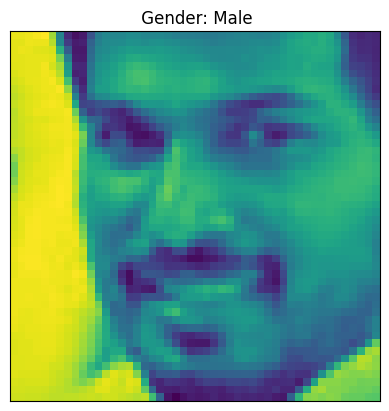

min and max value in image:  0.03137255 0.9882353


In [ ]:
#!pip install tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import tensorflow as tf
from tensorflow import keras
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline
#from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv('age_gender.csv')


def show_min_max(array, i):
    random_image = array[i]
    print("min and max value in image: ", random_image.min(), random_image.max())

def plot_image(array, i, labels):
    plt.imshow(np.squeeze(array[i]))
    plt.title(" Gender: " + "Male" if labels[i]==0 else "Female")
    plt.xticks([])
    plt.yticks([])
    plt.show()


features = ['age','ethnicity','pixels']

labels = ['male', 'female']
num_classes = 2

data = (df.loc[:,'pixels'])#feature of input, pixels
labels = (df.loc[:,'gender'])#target, gender of pic

data = data.str.split(pat = ' ', n=0, expand = True)
img_rows, img_cols = 48, 48
df_data = data.values
df_labels = labels.values
df_data = df_data.reshape(data.shape[0], img_rows, img_cols, 1)
#print(df_data.shape)


X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels,test_size = 0.25, random_state=0)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')



X_train = X_train/255
X_test = X_test/255

plot_image(X_train, 150, y_train)
show_min_max(X_train, 150)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
epochs = 10
batch_size = 64
input_shape = (48, 48, 1)
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate = 0.2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.2))
model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dense(2, activation='softmax'))
model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dense(2, activation = 'softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',  metrics=['accuracy'])
model.fit(np.array(X_train), np.array(y_train), batch_size = 64, epochs = epochs, shuffle = True)
scores = model.evaluate(np.array(X_test), np.array(y_test), verbose = 0)
print('Test accuracy:', scores[1])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 64)        36928     
                                                        

In [ ]:
model.save('gender_machine.h5')

In [ ]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
